In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#en cada variable se saca datos de cada hoja (sheet) del archivo excel

data20171=pd.read_excel('DATA-PRUEBA-REPITENCIAS 2017-1 AL 2019-2.xlsx', sheet_name=0)
data20172=pd.read_excel('DATA-PRUEBA-REPITENCIAS 2017-1 AL 2019-2.xlsx', sheet_name=1)
data20181=pd.read_excel('DATA-PRUEBA-REPITENCIAS 2017-1 AL 2019-2.xlsx', sheet_name=2)
data20182=pd.read_excel('DATA-PRUEBA-REPITENCIAS 2017-1 AL 2019-2.xlsx', sheet_name=3)
data20191=pd.read_excel('DATA-PRUEBA-REPITENCIAS 2017-1 AL 2019-2.xlsx', sheet_name=4)
data20192=pd.read_excel('DATA-PRUEBA-REPITENCIAS 2017-1 AL 2019-2.xlsx', sheet_name=5)


In [52]:
#Dimensiones de uno de los dataframe 
data20171.shape

(40810, 8)

In [53]:
# Como cada hoja del libro tiene las mismas columnas se concatena 
# para tener un solo dataframe y hacer mas facil las consultas 

dataGlobal=pd.concat([data20171,data20172,data20181,data20182,data20191,data20192])
aux=dataGlobal

In [54]:
#Dimensiones del dataframe  final
dataGlobal.shape

(161980, 8)

In [55]:
dataGlobal.head()

,cod_facultad,cod_escuela,cod_semestre,cod_alumno,cod_plan,cod_asignatura,asignatura,num_rep
0,1,1,20171,12010240,2015,M15011M,ATENCIÓN DE LA SALUD NIVEL I y II (I),1
1,1,1,20171,12010240,2015,M15026M,FARMACOLOGÍA BÁSICA APLICADA A LA MEDICINA,1
2,1,1,20171,12010240,2015,M15028M,FISIOPATOLOGÍA,1
3,1,1,20171,12010240,2015,M15034M,ATENCIÓN DE LA SALUD NIVEL I y II (II),1
4,1,1,20171,05010012,2015,M15022M,FISIOLOGÍA HUMANA II,4


<AxesSubplot:>

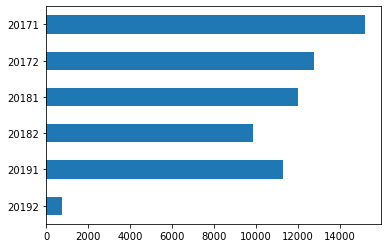

In [56]:
#Filtro para obtener las repitencias por semestre 
#dataGlobal[(dataGlobal['cod_facultad']==1) & (dataGlobal['cod_semestre']==20171)]

#Eliminar duplicado por codigo de semestre y codigo de alumno para 
#mantener un solo alumno por cada semestre 
pd.options.display.max_rows=60
dataGlobal.drop_duplicates(subset=['cod_semestre','cod_alumno'], inplace=True)
temp=dataGlobal['cod_semestre'].value_counts()
temp.sort_index( ascending=False).plot(kind='barh')

#temp=dataGlobal.sort_values('cod_semestre',ascending=False)
#temp
#dataGlobal[(dataGlobal['cod_semestre']==20171)]

In [57]:
# Extraemos los campos que nos importan de la tabla de codigo de escuelas
names=pd.read_excel('TABLA_CODIGOS_ESCUELAS-UNMSM.xlsx',usecols='C:F', skiprows=[0,1])
names.head()

,FACULTAD,COD-FAC,NOM-ESC,COD-ESC
0,MEDICINA,1.0,Medicina Humana,1
1,NaN,NaN,Obstetricia,2
2,NaN,NaN,Enfermería,3
3,NaN,NaN,Tecnología Médica,4
4,NaN,NaN,Nutrición,5


In [58]:
#como hay filas combinadas rellenamos los NaN con el ultimo valor valido
names.fillna(method='ffill', inplace=True)

#tambien Transformamos la columna COD-FAC en entero
names=names.astype({'COD-FAC':int})
names.head(10)

,FACULTAD,COD-FAC,NOM-ESC,COD-ESC
0,MEDICINA,1,Medicina Humana,1
1,MEDICINA,1,Obstetricia,2
2,MEDICINA,1,Enfermería,3
3,MEDICINA,1,Tecnología Médica,4
4,MEDICINA,1,Nutrición,5
5,FARMACIA Y BIOQUIMICA,4,Farmacia y Bioquímica,1
6,FARMACIA Y BIOQUIMICA,4,Ciencia de los Alimentos,2
7,FARMACIA Y BIOQUIMICA,4,Toxicología,3
8,ODONTOLOGIA,5,Odontología,1
9,MEDICINA VETERINARIA,8,Medicina Veterinaria,1


In [59]:
# Sacamos cada facultad y su codigo eliminando duplicados 
# para luego hacer un merge

facultad=names[['COD-FAC','FACULTAD']]
facultad.drop_duplicates(subset=['FACULTAD','COD-FAC'], inplace=True)

#renombramos la columna para hacer el merge
facultad.columns=['cod_facultad','FACULTAD']
facultad

<ipython-input-59-8ebe094e54be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facultad.drop_duplicates(subset=['FACULTAD','COD-FAC'], inplace=True)


,cod_facultad,FACULTAD
0,1,MEDICINA
5,4,FARMACIA Y BIOQUIMICA
8,5,ODONTOLOGIA
9,8,MEDICINA VETERINARIA
10,18,PSICOLOGIA
12,10,CEINCIAS BIOLOGICA
15,13,CIENCIAS FISICA
17,14,CIENCIAS MATEMATICAS
21,16,GGMCA
27,17,INGENIERIA INDUSTRIAL


In [60]:
# Concatenamos el codigo de faculdad y el codigo de escuela para 
# facilitar evitar incosistencias cuando se realize un merge  
names['COD-ESC']=names['COD-FAC'].astype(str)+names['COD-ESC'].astype(str)
escuela=names[['COD-ESC','NOM-ESC']]

#renombramos la columna para hacer el merge
escuela.columns=['cod_escuela','NOM-ESC']
escuela

,cod_escuela,NOM-ESC
0,11,Medicina Humana
1,12,Obstetricia
2,13,Enfermería
3,14,Tecnología Médica
4,15,Nutrición
...,...,...
61,152,Sociología
62,153,Antropología
63,154,Arqueología
64,155,Trabajo Social


In [61]:
#tambien concatenamos el codigo de facultad y el codigo de escuela en 
#dataframe original para hacer el merge 
dataGlobal['cod_escuela']=dataGlobal['cod_facultad'].astype(str)+dataGlobal['cod_escuela'].astype(str)


#realizamos el merge para los nombre de facultad y escuela
dataGlobal=pd.merge(dataGlobal,facultad,on='cod_facultad')
dataGlobal=pd.merge(dataGlobal,escuela,on='cod_escuela')
aux=dataGlobal
dataGlobal

,cod_facultad,cod_escuela,cod_semestre,cod_alumno,cod_plan,cod_asignatura,asignatura,num_rep,FACULTAD,NOM-ESC
0,1,11,20171,12010240,2015,M15011M,ATENCIÓN DE LA SALUD NIVEL I y II (I),1,MEDICINA,Medicina Humana
1,1,11,20171,05010012,2015,M15022M,FISIOLOGÍA HUMANA II,4,MEDICINA,Medicina Humana
2,1,11,20171,17010549,2015,M15001M,QUÍMICA INTEGRADA APLICADA A LA MEDICINA,1,MEDICINA,Medicina Humana
3,1,11,20171,15010272,2015,M15021M,HISTOLOGÍA Y EMBRIOLOGÍA II,1,MEDICINA,Medicina Humana
4,1,11,20171,15010029,2015,M15005M,HISTORIA DE LA MEDICINA,2,MEDICINA,Medicina Humana
...,...,...,...,...,...,...,...,...,...,...
61784,20,202,20192,17200315,2015,20W0303,ESTADÍSTICA Y PROBABILIDADES,1,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software
61785,20,202,20192,14200211,2009,2020701,ARQUITECTURA DE SOFTWARE,2,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software
61786,20,202,20192,17200076,2015,20W0107,TEORÍA GENERAL DE SISTEMAS,3,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software
61787,20,202,20192,16200056,2015,20W0203,CÁLCULO II,3,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software


In [62]:
#verificamos que no haya nulos aunqeu igual se perdieron lagunos datos por falta de escuelas en 
# la tabla de nombres
dataGlobal.isnull().sum()

cod_facultad      0
cod_escuela       0
cod_semestre      0
cod_alumno        0
cod_plan          0
cod_asignatura    0
asignatura        0
num_rep           0
FACULTAD          0
NOM-ESC           0
dtype: int64

# Pregunta 1 :
### DETERMINAR POR FACULTAD, ESCUELA POR SEMESTRE, CANTIDAD DE ALUMNOS CON REPITENCIAS

In [63]:
pd.options.display.max_rows=None
tab=pd.crosstab(index=[dataGlobal['FACULTAD'],dataGlobal['NOM-ESC']],columns=[dataGlobal['cod_semestre']], margins=True, margins_name='Total')

tab
#pd.options.display.max_rows=60

cod_semestre                                                                           20171  \
FACULTAD                             NOM-ESC                                                   
ADMINISTRACION                       Administración                                      335   
                                     Administración de Negocios Internacionales          241   
                                     Administración de Turismo                           186   
CEINCIAS BIOLOGICA                   Ciencias Biológicas                                 184   
                                     Genética y Biotecnología                             63   
                                     Microbiología y Parasitología                       135   
CIENCIAS ECONOMICAS                  Economía                                            566   
                                     Economía Internacional                              258   
                                     Economía Pública                                    247   
CIENCIAS FISICA                      Física                                              225   
                                     Ingeniería Mecánica de Fluidos                      487   
CIENCIAS MATEMATICAS                 Computación Científica                              175   
                                     Estadística                                         178   
                                     Investigación Operativa                             280   
                                     Matemática                                          301   
CIENCIAS SOCIALES                    Antropología                                        232   
                                     Arqueología                                         129   
                                     Geografía                                           226   
                                     Historia                                            163   
                                     Sociología                                          217   
                                     Trabajo Social                                      169   
CONTABILIDAD                         Auditoría Empresarial y del Sector Público          190   
                                     Contabilidad                                        351   
                                     Gestión Tributaria                                  252   
DERECHO Y CIENCIAS POLITICAS         Ciencia Política                                    204   
                                     Derecho                                             642   
EDUCACION                            Educación                                           423   
                                     Educación Física                                    343   
FARMACIA Y BIOQUIMICA                Ciencia de los Alimentos                             46   
                                     Farmacia y Bioquímica                               226   
                                     Toxicología                                          53   
GGMCA                                Ingeniería Ambiental                                 35   
                                     Ingeniería Civil                                    195   
                                     Ingeniería Geográfica                               138   
                                     Ingeniería Geológica                                173   
                                     Ingeniería Metalúrgica                              246   
                                     Ingeniería de Minas                                 121   
INGENIERIA DE SISTEMAS E INFORMATICA Ingeniería de Sistemas                              706   
                                     Ingeniería de Software                              330   
INGENIERIA ELECTGRONICA Y ELECTRICA  Ingeniería Eléctrica       

In [64]:

"""
Codigo comentado de algunas validaciones

escuela.sort_values('cod_escuela').values
escuela['cod_escuela']=escuela['cod_escuela'].astype(int)
escuela.sort_values('cod_escuela').values

pd.unique(dataGlobal.cod_escuela)

pd.unique(dataGlobal.cod_facultad)

facultad.sort_values('cod_facultad').values

dataGlobal[dataGlobal['cod_escuela']=='66'].shape

dataGlobal[dataGlobal['cod_escuela']==11].shape

print(str(data20171.shape)+
      ' --  '+str(data20172.shape)+
      ' --  '+str(data20181.shape)+
      ' --  '+str(data20182.shape)+
      ' --  '+str(data20191.shape)+
      ' --  '+str(data20192.shape)+'  ')

"""


"\nCodigo comentado de algunas validaciones\n\nescuela.sort_values('cod_escuela').values\nescuela['cod_escuela']=escuela['cod_escuela'].astype(int)\nescuela.sort_values('cod_escuela').values\n\npd.unique(dataGlobal.cod_escuela)\n\npd.unique(dataGlobal.cod_facultad)\n\nfacultad.sort_values('cod_facultad').values\n\ndataGlobal[dataGlobal['cod_escuela']=='66'].shape\n\ndataGlobal[dataGlobal['cod_escuela']==11].shape\n\nprint(str(data20171.shape)+\n      ' --  '+str(data20172.shape)+\n      ' --  '+str(data20181.shape)+\n      ' --  '+str(data20182.shape)+\n      ' --  '+str(data20191.shape)+\n      ' --  '+str(data20192.shape)+'  ')\n\n"

# Pregunta 2:

###  DETERMINAR CANTIDAD DE REPITENCIAS (1 REP, 2DA REP, 3 REP, 4 REP, 5 REP.) POR ESCUELAS Y POR PLANES DE ESTUDIOS

# OBS
### Se fitra la data por codigo de facultad y plan ya que una tabla general es muy extensa y confusa


In [65]:
pd.options.display.max_rows=None
fac=20
plan='2009  '

tab2=dataGlobal[ (dataGlobal['cod_facultad']==20) & (dataGlobal['cod_plan']==plan)]
tab2=pd.crosstab(index=[tab2['FACULTAD'],tab2['NOM-ESC']],columns=[tab2['cod_plan'],tab2['num_rep']], margins=True, margins_name='Total')

tab2

cod_plan                                                    2009              \
num_rep                                                          1    2    3   
FACULTAD                             NOM-ESC                                   
INGENIERIA DE SISTEMAS E INFORMATICA Ingeniería de Sistemas    632  214   70   
                                     Ingeniería de Software    386  146   47   
Total                                                         1018  360  117   

cod_plan                                                                       \
num_rep                                                       4   5   6  7  8   
FACULTAD                             NOM-ESC                                    
INGENIERIA DE SISTEMAS E INFORMATICA Ingeniería de Sistemas  30  10   4  3  2   
                                     Ingeniería de Software  20   4   9  0  0   
Total                                                        50  14  13  3  2   

cod_plan                                                    Total  
num_rep                                                            
FACULTAD                             NOM-ESC                       
INGENIERIA DE SISTEMAS E INFORMATICA Ingeniería de Sistemas   965  
                                     Ingeniería de Software   612  
Total                                                        1577

In [66]:
pd.options.display.max_rows=60

In [67]:
pd.unique(dataGlobal.cod_facultad)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [68]:
escuela.shape

(66, 2)

In [69]:
pd.unique(dataGlobal.cod_escuela).shape

(65,)

In [70]:
dataGlobal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61789 entries, 0 to 61788
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cod_facultad    61789 non-null  int64 
 1   cod_escuela     61789 non-null  object
 2   cod_semestre    61789 non-null  int64 
 3   cod_alumno      61789 non-null  object
 4   cod_plan        61789 non-null  object
 5   cod_asignatura  61789 non-null  object
 6   asignatura      61789 non-null  object
 7   num_rep         61789 non-null  int64 
 8   FACULTAD        61789 non-null  object
 9   NOM-ESC         61789 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.2+ MB


# Pregunta 4 

### DETERMINAR POR CURSOS QUE MAYOR REPITENCIA SE DA EN LA UNMSM Y EN QUE FACULTADES y COMO ES EN LA FISI (SISTEMAS Y SOFTWARE)

In [71]:
#retomamos los datos originales de repitencias, antes de eliminar duplicados(semestre, codigo_alumno) 
#ya que queremos contabilizar en que cursos esta la mayor catidad de observados 

pd.options.display.max_rows=60

#Realizamos un groub by para contar la cantidad de repitencias por curso 
auxori=dataGlobal
dataGlobal=aux
tab4=dataGlobal.groupby(['FACULTAD','NOM-ESC','asignatura','cod_semestre'], as_index=False)['cod_alumno'].count()

#pd.options.display.max_rows=None
#tab4_1=tab4.groupby(['FACULTAD','NOM-ESC','cod_semestre'], as_index=False)['asignatura','cod_alumno'].max()


#Utilzamos la funcion idmax para obetener el mayor valor 
tab4_1=tab4.loc[tab4.groupby(['FACULTAD','NOM-ESC','cod_semestre'])["cod_alumno"].idxmax()]
#tab4_2=pd.crosstab(index=[tab4_1['FACULTAD'],tab4_1['NOM-ESC'],tab4_1['cod_semestre'],tab4_1['asignatura'],tab4_1['cod_alumno']],columns=[])
tab4_1=tab4_1.sort_index()

pd.options.display.max_rows=None
tab4_2=tab4_1.groupby(['FACULTAD','NOM-ESC','cod_semestre','asignatura']).max()
tab4_2.head(len(tab4_1))




cod_alumno
FACULTAD                             NOM-ESC                                          cod_semestre asignatura                                                    
ADMINISTRACION                       Administración                                   20171        COSTOS Y PRESUPUESTOS                                       19
                                                                                      20172        CONTABILIDAD GERENCIAL                                      33
                                                                                      20181        SOCIOLOGÍA                                                  22
                                                                                      20182        CONTABILIDAD GERENCIAL                                      28
                                                                                      20191        COSTOS Y PRESUPUESTOS                                       25
                                                                                      20192        PRACTICAS PRE PROFESIONALES                                  4
                                     Administración de Negocios Internacionales       20171        PROYECTOS DE INVERSIÓN                                      23
                                                                                      20172        PROYECTOS DE INVERSIÓN                                      25
                                                                                      20181        PLANEAMIENTO EMPRESARIAL                                    35
                                                                                      20182        ACREDITACIÓN OTRO IDIOMA EXTRANJERO                         20
                                                                                      20191        ACREDITACIÓN OTRO IDIOMA EXTRANJERO                         15
                                                                                      20192        CANALES Y ESTRATÉGIAS DE DISTRIBUCIÓN INTERNACI...           1
                                     Administración de Turismo                        20171        MATEMÁTICA I                                                33
                                                                                      20172        COSTOS Y PRESUPUESTOS                                       14
                                                                                      20181        GESTION TURISTICA EN ORGANISMOS GUBERNAMENTALES              7
                                                                                      20182        COSTOS Y PRESUPUESTOS                                       17
                                                                                      20191        ESTADÍSTICA DESCRIPTIVA                                     29
                                                                                      20192        GUÍA DE TURISMO                                              2
CEINCIAS BIOLOGICA                   Ciencias Biológicas                              20171        MATEMÁTICAS I                                               19
                                                                                      20172        MATEMÁTICAS I                                               20
                                                                                      20181        TALLER DE LENGUAJE Y REDACCIÓN                              13
                                                                                      20182        MICROBIOLOGIA GENERAL                                       10
                                                                                      20191        GENETICA GENERAL                                            25
                                                                                      20192        BI

In [72]:
#print(tab4_1[tab4_1.index.isin(['Ciencias Biológicas'], level=1)])
facultad='INGENIERIA DE SISTEMAS E INFORMATICA'
temp=tab4_2[tab4_2.index.get_level_values('FACULTAD').isin([facultad])]
temp

#print df[np.in1d(df.index.get_level_values(1), ['Lake', 'River', 'Upland'])]

cod_alumno
FACULTAD                             NOM-ESC                cod_semestre asignatura                                           
INGENIERIA DE SISTEMAS E INFORMATICA Ingeniería de Sistemas 20171        CALCULO I                                          73
                                                            20172        ECONOMIA                                           72
                                                            20181        ALGORÍTMICA II                                     44
                                                            20182        CÁLCULO II                                         24
                                                            20191        PROGRAMACIÓN Y FUNDAMENTOS DE ALGORÍTMICA          72
                                                            20192        ALGORÍTMICA II                                     15
                                     Ingeniería de Software 20171        MATEMÁTICA BÁSICA I                                33
                                                            20172        MATEMÁTICA BÁSICA II                               31
                                                            20181        SERIES Y ECUACIONES DIFERENCIALES                  26
                                                            20182        MATEMÁTICAS DISCRETAS                              17
                                                            20191        LENGUAJES Y COMPILADORES                           44
                                                            20192        SERIES Y ECUACIONES DIFERENCIALES                   9

In [73]:
#tab3.sort_values(20171, ascending=True)[20171].plot(kind='barh')

In [74]:
dataGlobal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61789 entries, 0 to 61788
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cod_facultad    61789 non-null  int64 
 1   cod_escuela     61789 non-null  object
 2   cod_semestre    61789 non-null  int64 
 3   cod_alumno      61789 non-null  object
 4   cod_plan        61789 non-null  object
 5   cod_asignatura  61789 non-null  object
 6   asignatura      61789 non-null  object
 7   num_rep         61789 non-null  int64 
 8   FACULTAD        61789 non-null  object
 9   NOM-ESC         61789 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.2+ MB


# Graficos adicionales

In [75]:
pd.options.display.max_rows=60
dataGlobal

,cod_facultad,cod_escuela,cod_semestre,cod_alumno,cod_plan,cod_asignatura,asignatura,num_rep,FACULTAD,NOM-ESC
0,1,11,20171,12010240,2015,M15011M,ATENCIÓN DE LA SALUD NIVEL I y II (I),1,MEDICINA,Medicina Humana
1,1,11,20171,05010012,2015,M15022M,FISIOLOGÍA HUMANA II,4,MEDICINA,Medicina Humana
2,1,11,20171,17010549,2015,M15001M,QUÍMICA INTEGRADA APLICADA A LA MEDICINA,1,MEDICINA,Medicina Humana
3,1,11,20171,15010272,2015,M15021M,HISTOLOGÍA Y EMBRIOLOGÍA II,1,MEDICINA,Medicina Humana
4,1,11,20171,15010029,2015,M15005M,HISTORIA DE LA MEDICINA,2,MEDICINA,Medicina Humana
...,...,...,...,...,...,...,...,...,...,...
61784,20,202,20192,17200315,2015,20W0303,ESTADÍSTICA Y PROBABILIDADES,1,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software
61785,20,202,20192,14200211,2009,2020701,ARQUITECTURA DE SOFTWARE,2,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software
61786,20,202,20192,17200076,2015,20W0107,TEORÍA GENERAL DE SISTEMAS,3,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software
61787,20,202,20192,16200056,2015,20W0203,CÁLCULO II,3,INGENIERIA DE SISTEMAS E INFORMATICA,Ingeniería de Software


# Pregunta 3 
### DETERMINAR LA PREDICCION USANDO MACHINE LEARNING COMO SERIA PARA 2020-1 Y 2020-2 

In [130]:
import math
#Sumarizamos las repitencias por semestre
p3=dataGlobal['cod_semestre'].value_counts()

p3.sort_index(inplace=True,)
p3=p3.reset_index()
p3.columns=['semestre','repitencias']
p3['ciclo']=p3['semestre']%10
p3['año']=p3['semestre'].map(lambda x:int(x/10))
#p3['semestre'].map(lambda x:math.modf(x/10))
#p3.loc[:,'ciclo'],p3.loc[:,'año']=
#math.modf(p3.loc[:,'semestre']/10)
p3


,semestre,repitencias,ciclo,año
0,20171,15161,1,2017
1,20172,12770,2,2017
2,20181,11974,1,2018
3,20182,9846,2,2018
4,20191,11288,1,2019
5,20192,750,2,2019


In [131]:
#borraremos el semestre 20192 ya que difiere mucho con los otros años 
p3=p3.drop(5)
#Variables predictoras
x=p3[['año','ciclo']]
#Variables objetivo 
y=p3.repitencias


In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
#Creamo y entrenamos el modelo 
#dejamos que sklearn decuida los mejores parametros
lrm=LinearRegression()
lrm.fit(x,y)

LinearRegression()

In [146]:
#peridos que queiro predecir 2020-1 y 2020-2
#Creamos dataframe
test=pd.DataFrame({'año':[2020,2020],'ciclo':[1,2]})
#test=[[2020,1],[2020,2]]
test

,año,ciclo
0,2020,1
1,2020,2


In [147]:
#realizo las predicciones usando el modelo 
test['predicciones']=lrm.predict(test)
test

,año,ciclo,predicciones
0,2020,1,8539.666667
1,2020,2,5973.000000


In [148]:
#redondeamos decimales ya que cantidad de alumnos no puede se entero
test['predicciones']=test['predicciones'].astype(int)
test

,año,ciclo,predicciones
0,2020,1,8539
1,2020,2,5973


## Respuesta 
### Para el ciclo 2020-I y 2020-II la cantidad de observados sera aproximadamente 8539 y 5973 respectivamente 

In [161]:
# En el dataframe original predecimos las repitencias co el modelo para poder
# calcular el error en la prediccion del modelo de regresion lineal 
p3['predicciones']=lrm.predict(p3[['año','ciclo']])
p3

,semestre,repitencias,ciclo,año,predicciones
0,20171,15161,1,2017,14941.666667
1,20172,12770,2,2017,12375.000000
2,20181,11974,1,2018,12807.666667
3,20182,9846,2,2018,10241.000000
4,20191,11288,1,2019,10673.666667


In [159]:
# Utilizamos herramientas de sklearn para sacar el estadistco R cuadrado
from sklearn.metrics import mean_squared_error, r2_score
r2_score(p3.repitencias,p3.predicciones)

0.9076734128315654

#### Se interpreta que el modelo puede calcular las cantidades con un 90% de precision